In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow

%matplotlib inline

# Lagrangian Interpolation

In [2]:
def lfun(xvals, jj, x):
    lval = np.ones(x.size)
    xjj = xvals[jj]
    xrem = xvals[:jj]
    xrem = np.append(xrem, xvals[jj+1:])
    denom = np.prod(xjj - xrem)
    for val in xrem:
        lval *= (x-val)
    return lval/denom
def lagran_interp(xvals, fvals, x):
    n = fvals.size
    ipoly = np.zeros(x.size)
    for jj in range(n):
        ipoly += fvals[jj]*lfun(xvals, jj, x)
    return ipoly

In [3]:
f1 = lambda x: x**2./(1.+x**4.)
xquery = np.linspace(-1., 1., int(1e3)+1)
ftrue = f1(xquery)
xnodes = xquery[::100]
fnodes = ftrue[::100]
print(xnodes.size)


11


# Plotting

In [52]:
def interp_plotter(xnodes, fnodes, xquery, ftrue, c):
    finterp = lagran_interp(xnodes, fnodes, xquery)
    plt.plot(xquery, np.ma.log10(np.abs(ftrue - finterp)), label=f"nodes {xnodes.size}", c=c)
    plt.xlabel("$x$")
    plt.ylabel("$\log_{10}|Error|$")
    # plt.ylim(-20, -4)
    # plt.show()
    

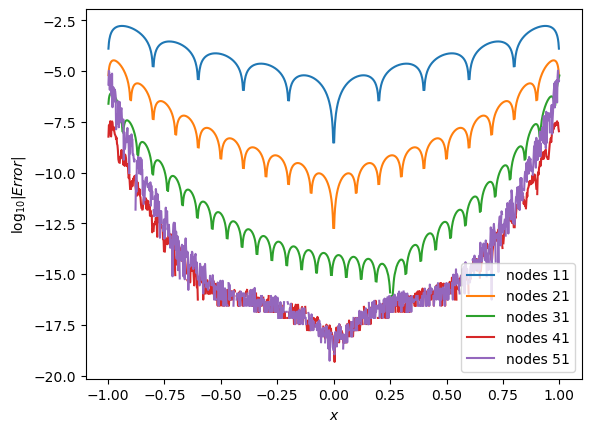

In [41]:
for i, c in zip(range(1, 6), (f"C{k}" for k in range(0, 10))):
    xnodes = xquery[::100//i]
    fnodes = ftrue[::100//i]
    interp_plotter(xnodes, fnodes, xquery, ftrue, c)

plt.legend()
plt.show()

    


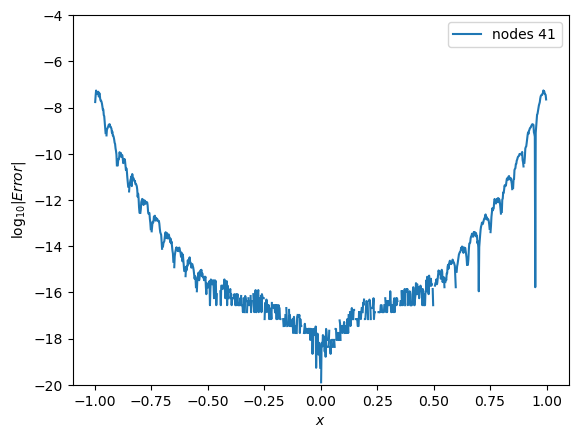

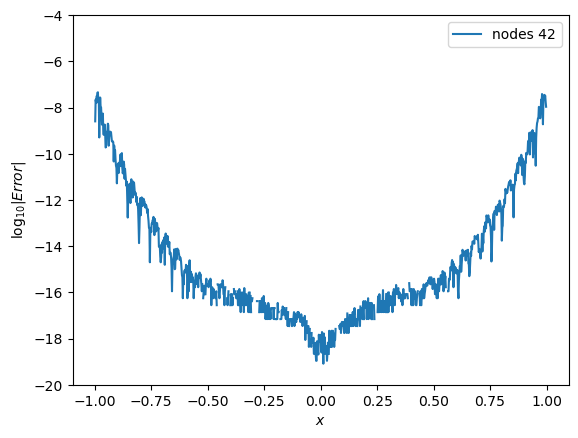

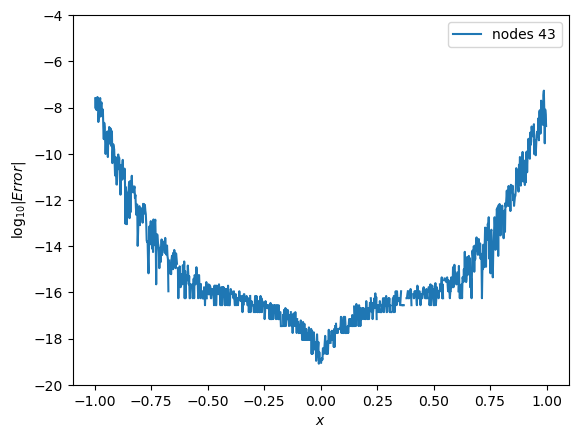

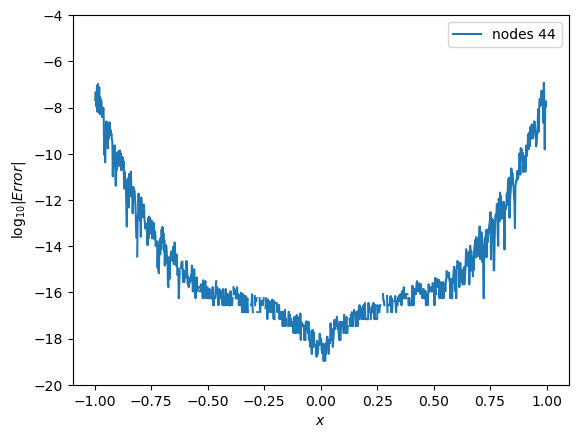

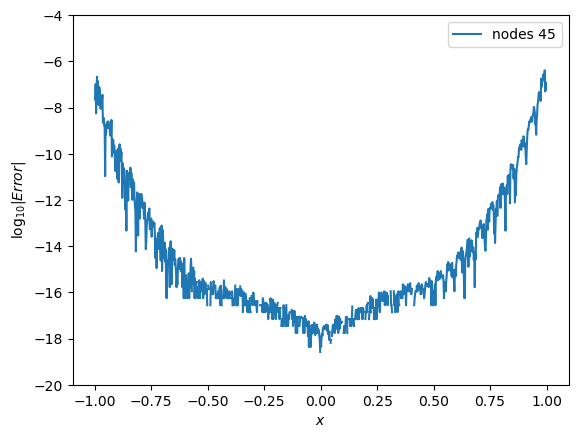

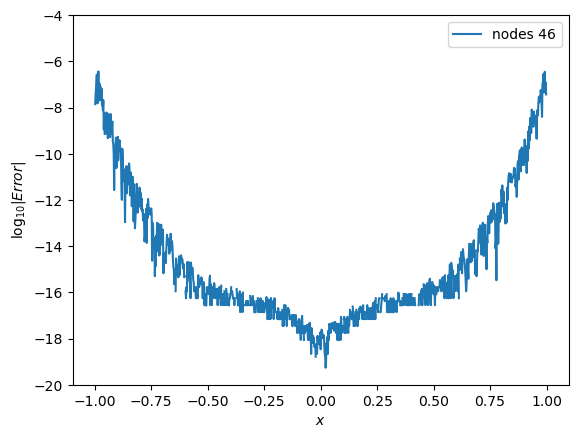

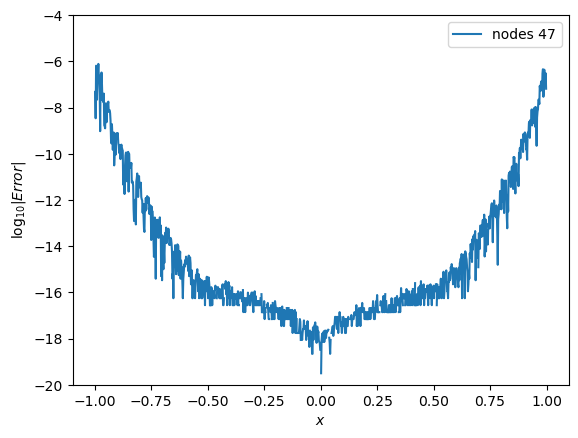

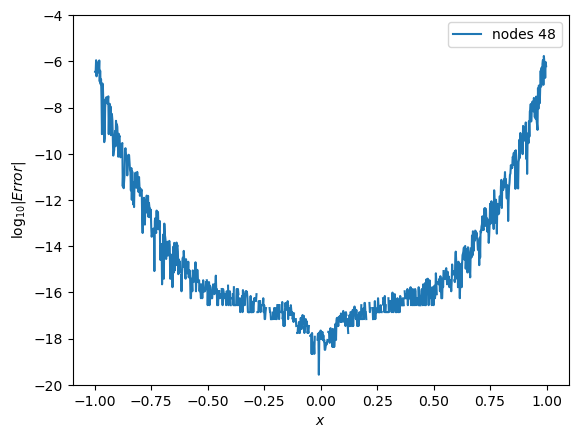

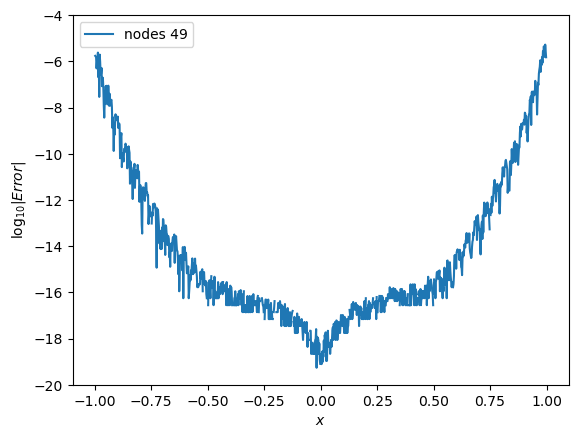

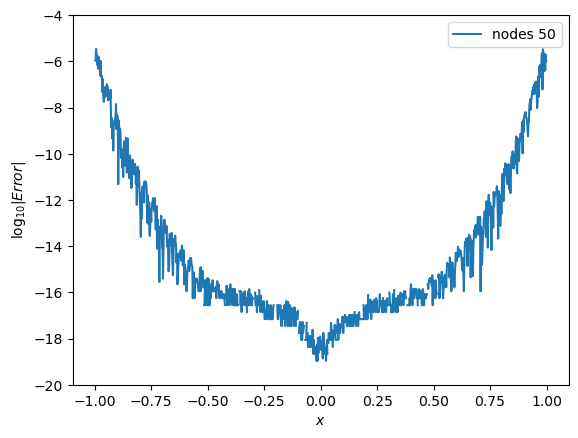

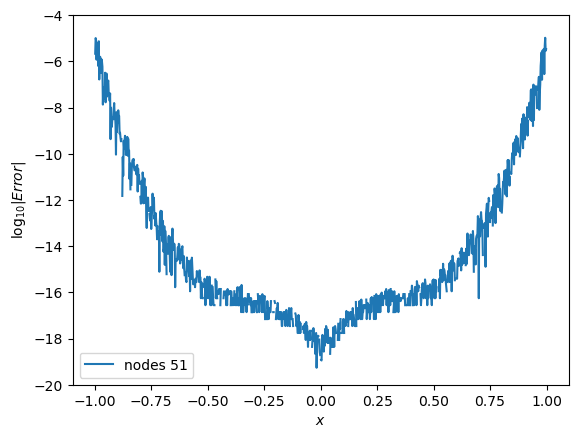

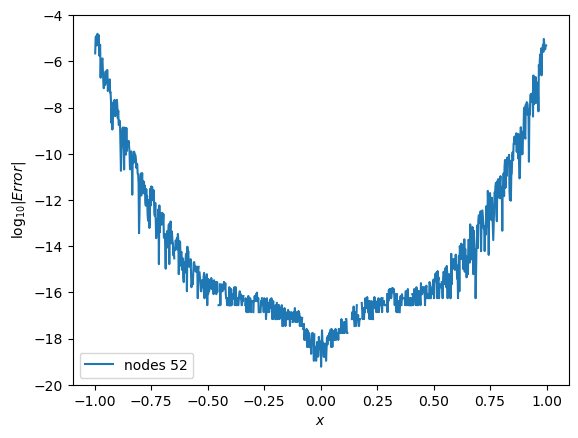

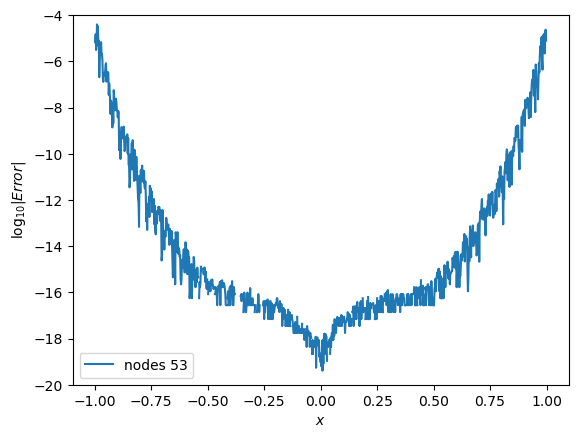

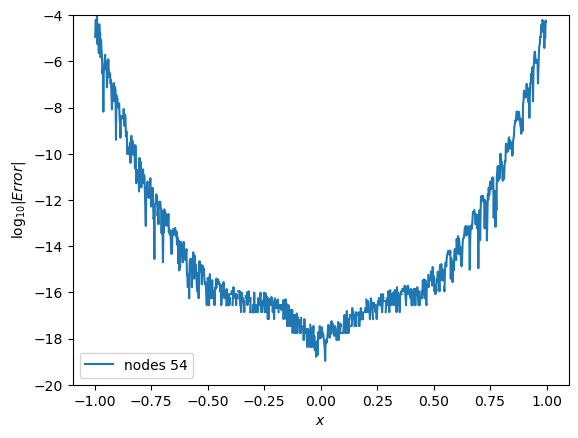

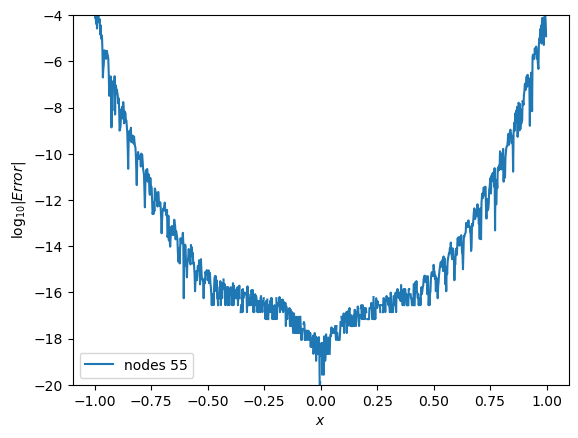

In [53]:
for i in range(0, 15):
    xnodes = np.linspace(-1, 1, 41+i)
    fnodes = f1(xnodes)

    interp_plotter(xnodes, fnodes, xquery, ftrue, c=None)

    plt.legend()
    plt.show() 

    


Node 50개부터 양끝이 오차가 커지기 시작하고 53개부터 확실하게 차이가 나는 것을 볼 수 있다.

# Chevysehv

11
1
11


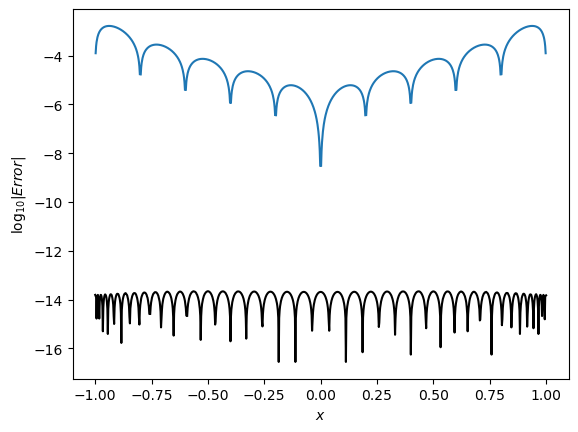

21
2
21


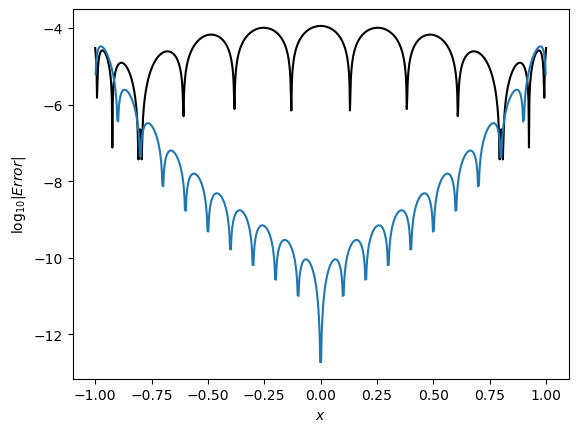

31
3
31


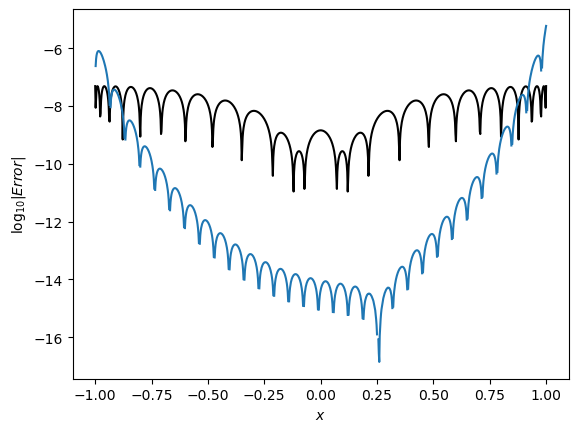

41
4
41


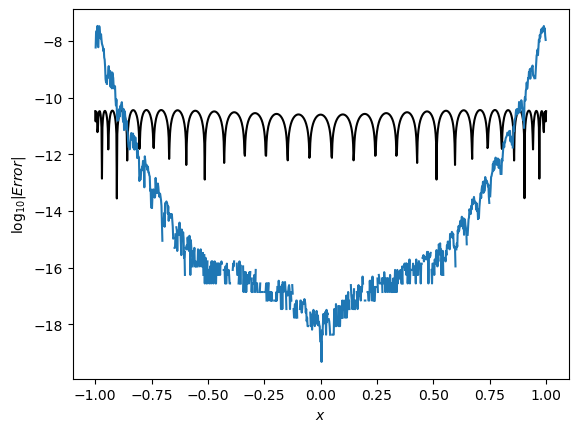

In [32]:
for i in range(1, 5):
    xnodes = xquery[::int(100/i)]
    fnodes = ftrue[::int(100/i)]
    print(xnodes.size)
    print(i)
    plt.plot(xinterp, np.ma.log10(np.abs(ftrue-finterp)), ls='-', color='k')
    ncheb = xnodes.size
    xinterp = xquery
    xcheb = np.cos(np.pi*(2.*np.arange(ncheb)+1.)/(2.*ncheb+2.))
    fcheb = f1(xcheb)
    finterp = lagran_interp(xcheb, fcheb, xinterp)
    print(xcheb.size)
    
    

    interp_plotter(xnodes, fnodes, xquery, ftrue)
    plt.show()


41
0
41


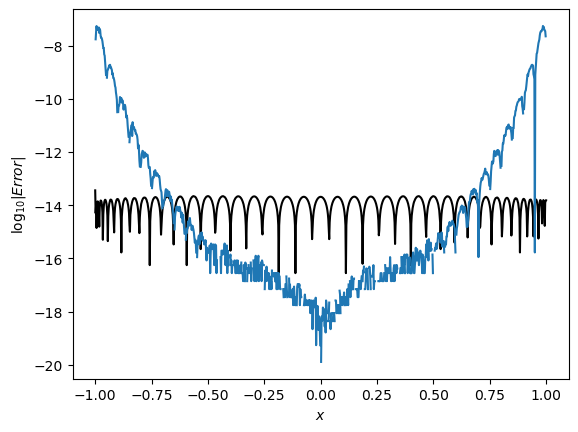

42
1
42


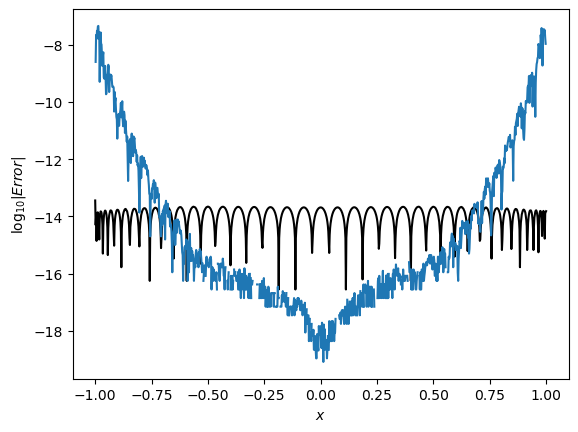

43
2
43


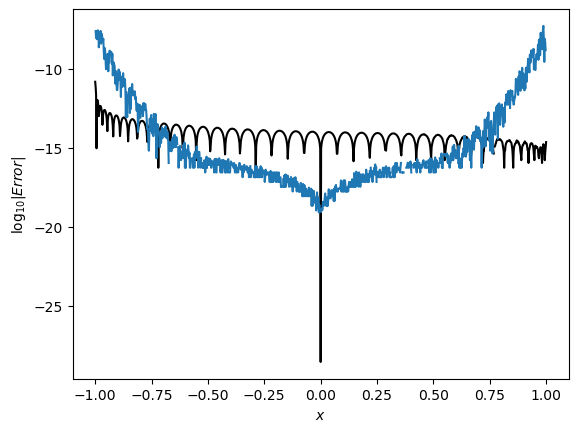

44
3
44


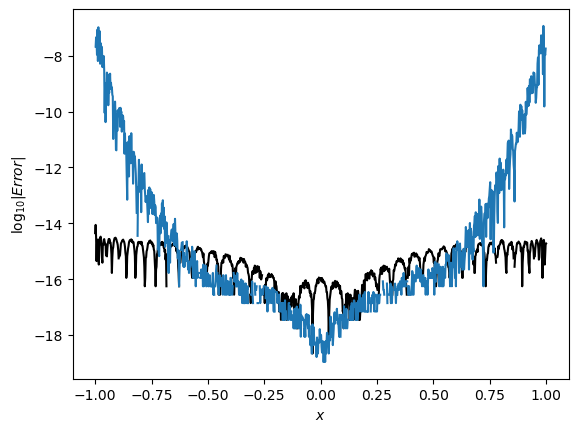

45
4
45


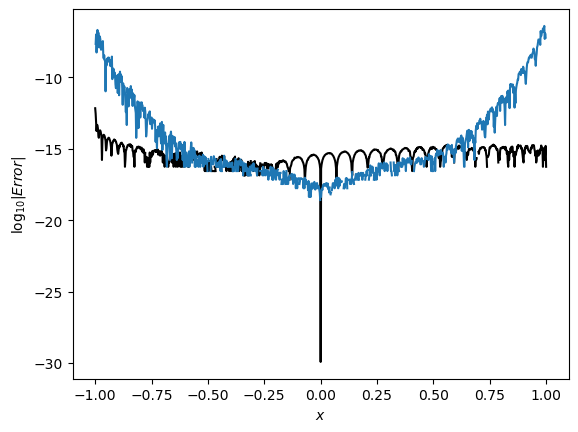

46
5
46


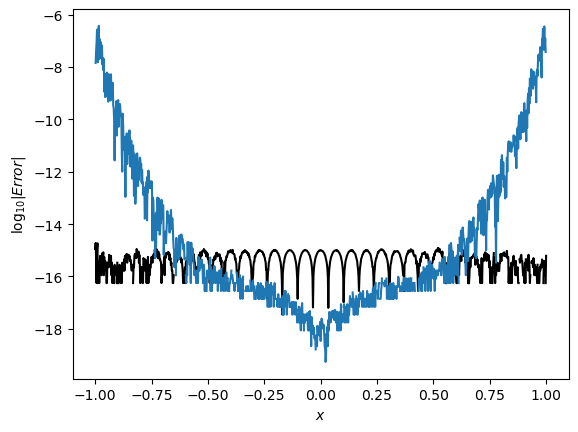

47
6
47


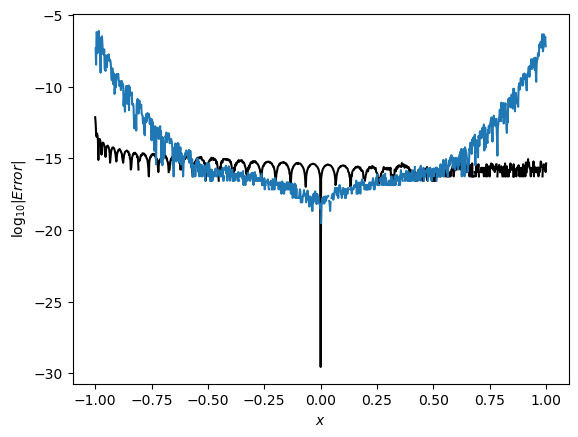

48
7
48


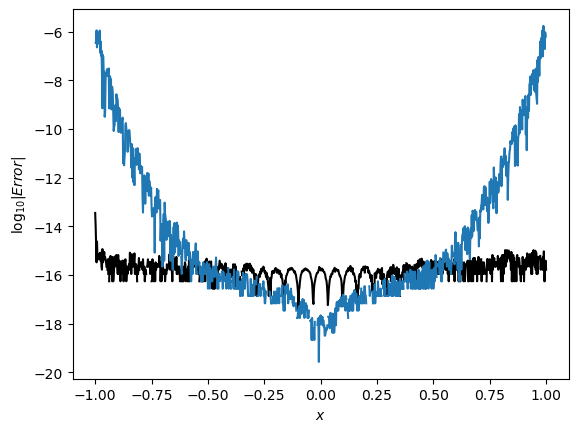

49
8
49


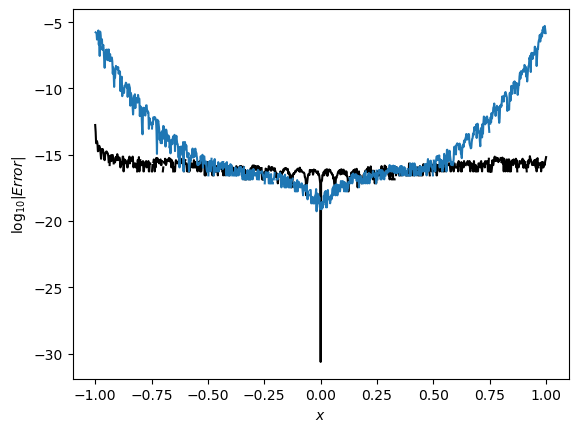

50
9
50


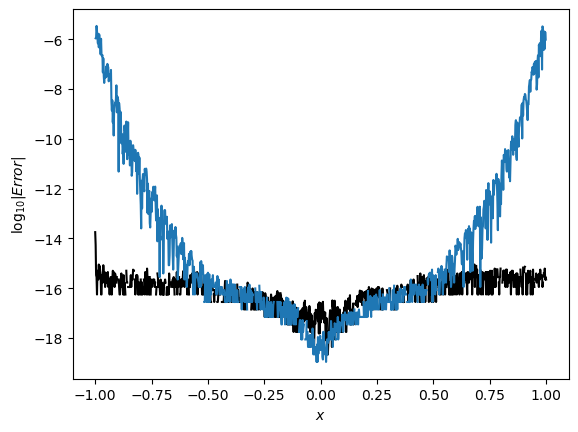

51
10
51


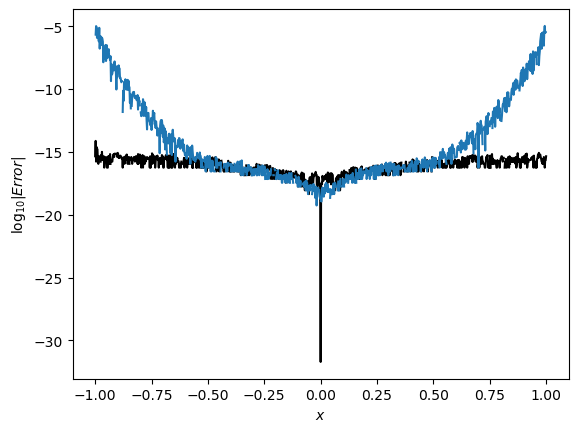

52
11
52


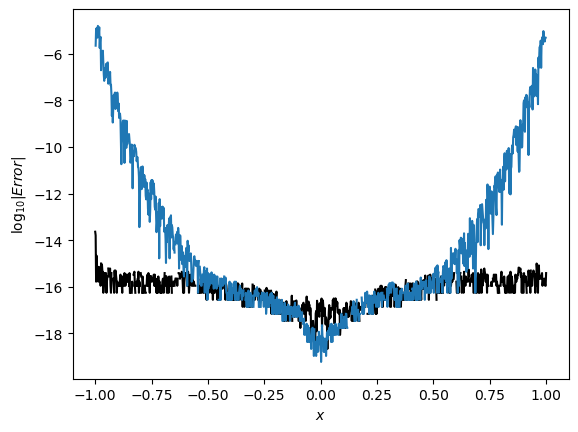

53
12
53


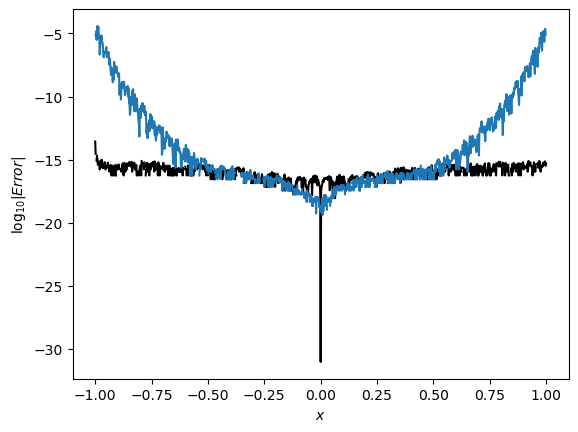

54
13
54


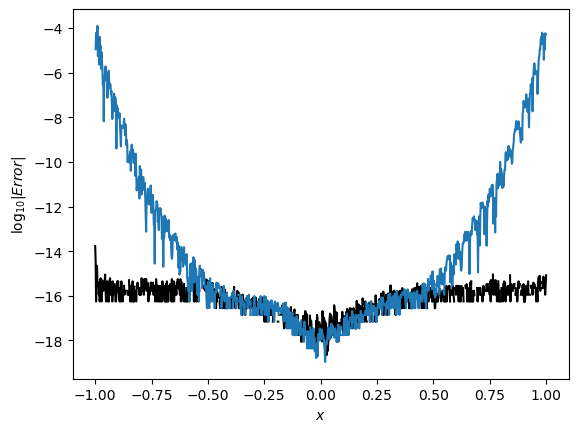

55
14
55


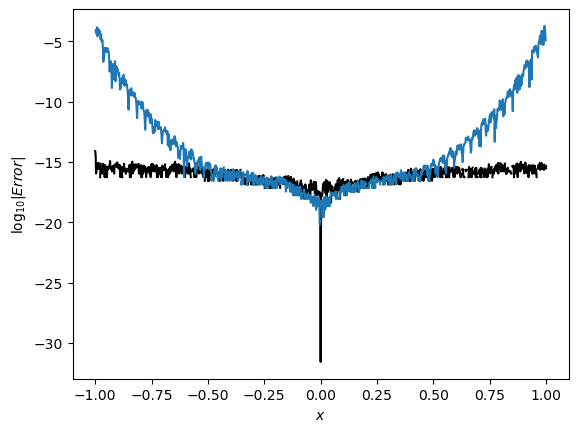

In [33]:
for i in range(0, 15):
    xnodes = np.linspace(-1, 1, 41+i)
    fnodes = f1(xnodes)
    print(xnodes.size)
    print(i)
    plt.plot(xinterp, np.ma.log10(np.abs(ftrue-finterp)), ls='-', color='k')
    ncheb = xnodes.size
    xinterp = xquery
    xcheb = np.cos(np.pi*(2.*np.arange(ncheb)+1.)/(2.*ncheb+2.))
    fcheb = f1(xcheb)
    finterp = lagran_interp(xcheb, fcheb, xinterp)
    print(xcheb.size)
    
    

    interp_plotter(xnodes, fnodes, xquery, ftrue)
    plt.show()
    


Compare with 